# Bank Customer Churn Analysis - EDA

This notebook contains the exploratory data analysis for the bank customer churn prediction project.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set_theme(style="whitegrid")  # Usando o tema do seaborn diretamente
%matplotlib inline

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load the dataset
df = pd.read_csv('../Bank Customer Churn Prediction.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()




Dataset Shape: (10000, 12)

First 5 rows:


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Detailed dataset analysis
print("=== Dataset General Information ===")
print("\nDataset Dimensions:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMemory and Types Information:")
df.info()

=== Dataset General Information ===

Dataset Dimensions: (10000, 12)

Data Types:
customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

Memory and Types Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   p

In [6]:
# Missing values analysis
print("=== Missing Values Analysis ===")
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_pct
})
print(missing_df[missing_df['Missing Values'] > 0] if missing_df['Missing Values'].sum() > 0 else "No missing values found")

# Check for duplicates
print("\n=== Duplicates Analysis ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

=== Missing Values Analysis ===
No missing values found

=== Duplicates Analysis ===
Number of duplicate rows: 0


=== Target Variable (Churn) Analysis ===

Churn Distribution:
       Count  Percentage (%)
churn                       
0       7963           79.63
1       2037           20.37


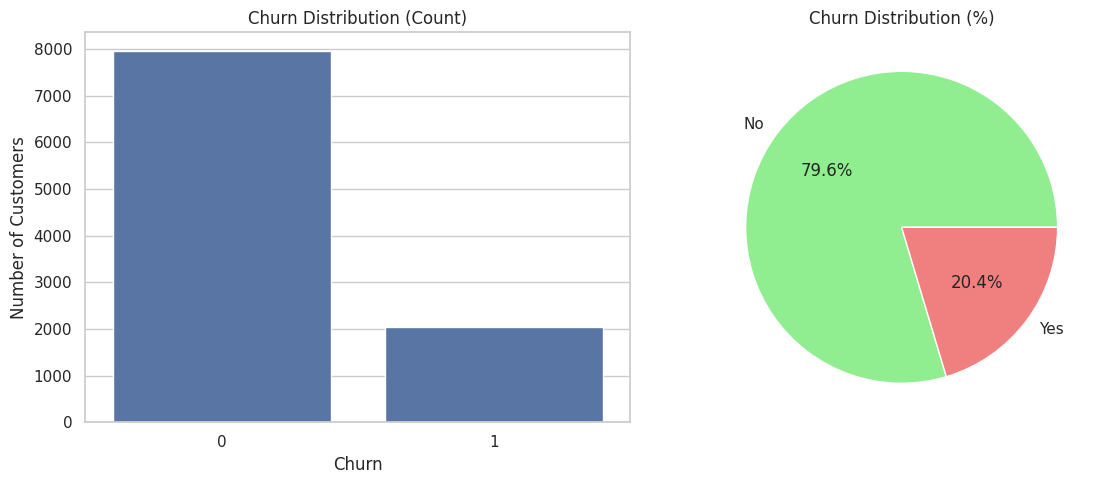

In [7]:
# Churn distribution analysis
print("=== Target Variable (Churn) Analysis ===")
churn_dist = df['churn'].value_counts()
churn_pct = df['churn'].value_counts(normalize=True) * 100

# Create DataFrame with statistics
churn_stats = pd.DataFrame({
    'Count': churn_dist,
    'Percentage (%)': churn_pct
})
print("\nChurn Distribution:")
print(churn_stats)

# Churn distribution visualization
plt.figure(figsize=(12, 5))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(x=churn_stats.index, y='Count', data=churn_stats)
plt.title('Churn Distribution (Count)')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(churn_stats['Percentage (%)'], labels=['No', 'Yes'], autopct='%1.1f%%', 
        colors=['lightgreen', 'lightcoral'])
plt.title('Churn Distribution (%)')

plt.tight_layout()
plt.show()

Statistical analysis of numerical variables

In [10]:
# Statistical analysis of numerical variables
print("=== Numerical Variables Analysis ===")
print("\nSummary Statistics:")
df.describe()

=== Numerical Variables Analysis ===

Summary Statistics:


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


Analysis of categorical variables

In [11]:
# Analysis of categorical variables
print("=== Categorical Variables Analysis ===")
categorical_columns = ['country', 'gender', 'credit_card', 'active_member', 'churn']

for col in categorical_columns:
    print(f"\n{col.title()} Distribution:")
    print(df[col].value_counts())
    print(f"Percentage:\n{df[col].value_counts(normalize=True) * 100}")

=== Categorical Variables Analysis ===

Country Distribution:
country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Percentage:
country
France    50.14
Germany   25.09
Spain     24.77
Name: proportion, dtype: float64

Gender Distribution:
gender
Male      5457
Female    4543
Name: count, dtype: int64
Percentage:
gender
Male     54.57
Female   45.43
Name: proportion, dtype: float64

Credit_Card Distribution:
credit_card
1    7055
0    2945
Name: count, dtype: int64
Percentage:
credit_card
1   70.55
0   29.45
Name: proportion, dtype: float64

Active_Member Distribution:
active_member
1    5151
0    4849
Name: count, dtype: int64
Percentage:
active_member
1   51.51
0   48.49
Name: proportion, dtype: float64

Churn Distribution:
churn
0    7963
1    2037
Name: count, dtype: int64
Percentage:
churn
0   79.63
1   20.37
Name: proportion, dtype: float64


Visualization of distributions of numerical variables

In [ ]:
# Visualize distributions of numerical variables
numerical_columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Create a figure with subplots
plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()